In [5]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

In [6]:
%store -r par_3

%store -r patients_personalInfo

In [7]:
#parameter_1
my_parameter = par_3

In [8]:
# Relative frequences for answers of every question

relative_frequencies = my_parameter.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,q23,q29,q27
1,0.098266,0.011561,0.005780
2,0.213873,0.115607,0.063584
3,0.208092,0.086705,0.104046
4,0.398844,0.346821,0.398844
5,0.069364,0.433526,0.393064
6,0.011561,0.005780,0.034682


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_20873/1239226517.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


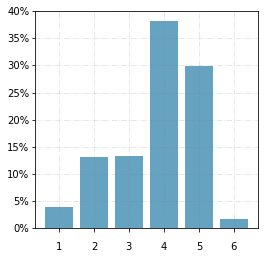

In [9]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/3
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5','6')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig('distribution.png')

plt.show()

In [10]:
my_parameter.describe()

,q23,q29,q27
count,173.000000,173.000000,173.000000
mean,3.161850,4.092486,4.213873
std,1.170043,1.052462,0.949561
min,1.000000,1.000000,1.000000
25%,2.000000,4.000000,4.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,6.000000,6.000000,6.000000


In [11]:
parameter = my_parameter

individualScore = parameter.sum(axis=1)/3

In [12]:
individualScore.describe()

count    173.000000
mean       3.822736
std        0.731832
min        1.666667
25%        3.333333
50%        3.666667
75%        4.666667
max        5.666667
dtype: float64

### Correlation Analysis

## Gender

In [13]:
# GENDER

gender = patients_personalInfo['sex']
gender = pd.concat([gender,individualScore],axis=1)
gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 2:
        female.append(row['Score'])
    else:
        male.append(row['Score'])

In [14]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.872852233676976 var male = 0.5027337891616774 avg female = 3.758771929824561 var female = 0.5631540473991998


In [15]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.31381980123027664 T-Statistic:-1.0104892636503404


## Education

In [16]:
#EDUCATION
education = patients_personalInfo['education']

education= pd.concat([education,individualScore],axis=1)

education.columns = ['Education','Score']

education = education.dropna()



In [17]:
print("Mean")
education.groupby('Education')['Score'].mean()

Mean


Education
1.0    3.977778
2.0    3.500000
3.0    3.431373
4.0    3.810606
5.0    3.870370
6.0    3.954545
7.0    3.843750
8.0    3.571429
Name: Score, dtype: float64

In [18]:
print("Variance")
education.groupby('Education')['Score'].var()

Variance


Education
1.0    0.382631
2.0    4.500000
3.0    0.746732
4.0    0.430996
5.0    0.733842
6.0    0.595719
7.0    0.444332
8.0    0.433862
Name: Score, dtype: float64

In [19]:
defterovathmia = []
texnologiki = []
panepistimiaki = []


#create table for every category of profession
for index, row in education.iterrows(): 
    if row['Education'] == 1 or row['Education'] == 2 or row['Education'] == 3 or row['Education'] == 4:
        defterovathmia.append(row['Score'])
    elif row['Education'] == 5 or row['Education'] == 6:
        texnologiki.append(row['Score'])
    elif row['Education'] == 7 or row['Education'] == 8:
        panepistimiaki.append(row['Score'])


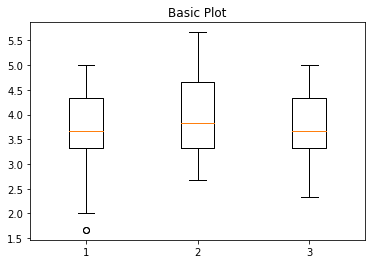

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([defterovathmia,texnologiki,panepistimiaki])

plt.show()

In [21]:
f_oneway(defterovathmia,texnologiki,panepistimiaki)

F_onewayResult(statistic=0.45363141363642323, pvalue=0.6360881578554192)

## Family

In [22]:
#OIKOGENIAKI KATASTASI 

family = patients_personalInfo['family']

family= pd.concat([family,individualScore],axis=1)

family.columns = ['Family','Score']

family = family.dropna()


In [23]:
print("Mean")
family.groupby('Family')['Score'].mean()

Mean


Family
1.0    3.738095
2.0    3.627451
3.0    3.975610
Name: Score, dtype: float64

In [24]:
print("Variance")
family.groupby('Family')['Score'].var()

Variance


Family
1.0    0.693795
2.0    0.335116
3.0    0.468534
Name: Score, dtype: float64

In [25]:
monos = []
se_gamo = []
se_gamo_me_paidia = []


#create table for every category of profession
for index, row in family.iterrows(): 
    if row['Family'] == 1:
        monos.append(row['Score'])
    elif row['Family'] == 2:
        se_gamo.append(row['Score'])
    elif row['Family'] == 3:
        se_gamo_me_paidia.append(row['Score'])


In [26]:
f_oneway(monos,se_gamo, se_gamo_me_paidia)

F_onewayResult(statistic=3.4960058442044666, pvalue=0.03252908114263093)

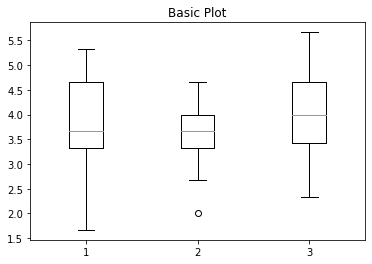

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([monos,se_gamo, se_gamo_me_paidia])

plt.show()


## Income

In [28]:
#income  

income = patients_personalInfo['income']

income= pd.concat([income,individualScore],axis=1)

income.columns = ['income','Score']

income = income.dropna()


In [29]:
print("Mean")
income.groupby('income')['Score'].mean()



Mean


income
1.0    3.804233
2.0    3.938596
3.0    3.571429
Name: Score, dtype: float64

In [30]:
print("Variance")
income.groupby('income')['Score'].var()

Variance


income
1.0    0.519591
2.0    0.437569
3.0    1.322751
Name: Score, dtype: float64

In [31]:
low = []
mid = []
high = []


#create table for every category of profession
for index, row in income.iterrows(): 
    if row['income'] == 1:
        low.append(row['Score'])
    elif row['income'] == 2:
        mid.append(row['Score'])
    elif row['income'] == 3:
        high.append(row['Score'])

In [32]:
f_oneway(low, mid, high)

F_onewayResult(statistic=0.9380753316843989, pvalue=0.3934206051765802)

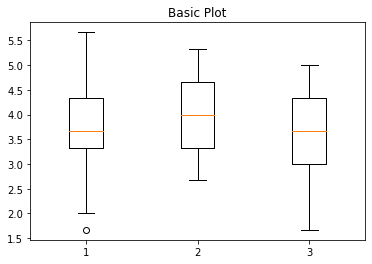

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([low,mid,high])

plt.show()



## Tomeas Nosileias

In [34]:
#tom nosileias  

nursing_field = patients_personalInfo['nursing field']

nursing_field= pd.concat([nursing_field,individualScore],axis=1)

nursing_field.columns = ['nursing_field','Score']

nursing_field = nursing_field.dropna()


In [35]:
print("Mean")
nursing_field.groupby('nursing_field')['Score'].mean()

Mean


nursing_field
1.0    3.614379
2.0    3.982270
3.0    3.641975
Name: Score, dtype: float64

In [36]:
print("Variance")
nursing_field.groupby('nursing_field')['Score'].var()

Variance


nursing_field
1.0    0.686100
2.0    0.481164
3.0    0.281418
Name: Score, dtype: float64

In [37]:
pathologiko = []
xeirourgiko = []
allo = []


#create table for every category of profession
for index, row in nursing_field.iterrows(): 
    if row['nursing_field'] == 1:
        pathologiko.append(row['Score'])
    elif row['nursing_field'] == 2:
        xeirourgiko.append(row['Score'])
    elif row['nursing_field'] == 3:
        allo.append(row['Score'])

        

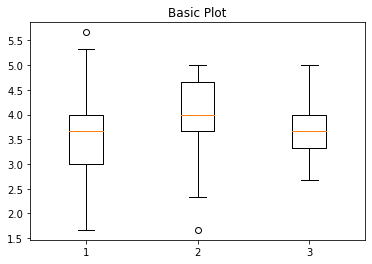

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([pathologiko,xeirourgiko,allo])

plt.show()

In [39]:
f_oneway(pathologiko,xeirourgiko,allo)

F_onewayResult(statistic=5.368316077196349, pvalue=0.00549077768197374)

## Days in hospital

In [40]:
patients_personalInfo

,sex,age,education,family,occupation,income,nationality,nursing field,nursing days,safety evaluation,comments
0,2,30.0,8.0,3.0,1.0,2.0,2,1.0,5.0,5.0,oxi
1,2,72.0,4.0,3.0,3.0,1.0,1,2.0,7.0,3.0,Περιστέρια στον θάλαμο
2,2,58.0,3.0,3.0,1.0,1.0,1,2.0,6.0,5.0,oxi
3,2,71.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,Peristeria ston thalamo
4,2,72.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,peristeria ston thalamo
5,2,58.0,3.0,1.0,3.0,1.0,1,1.0,7.0,3.0,oxi
6,2,45.0,4.0,3.0,3.0,2.0,2,1.0,NaN,5.0,oxi
7,1,60.0,3.0,2.0,1.0,2.0,1,2.0,4.0,5.0,oxi
8,1,60.0,1.0,1.0,2.0,1.0,1,2.0,5.0,5.0,oxi
9,2,30.0,5.0,1.0,2.0,1.0,1,2.0,2.0,5.0,oxi


In [41]:
days = patients_personalInfo['nursing days']
# create a frame with days and score
days = pd.concat([days,individualScore],axis=1)
days.columns = ['days','Score']
days = days.dropna()

In [42]:
# remove outliers
q = days['days'].quantile(0.99)
days = days[days['days'] < q]

In [43]:
x = days['days']
y = days['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))


(corr,p-val) = (0.06275901252584845, 0.43637845758104665)


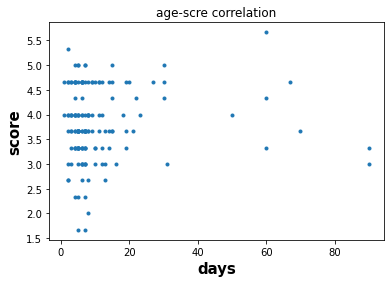

In [44]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("days",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

## Age

In [45]:
age = patients_personalInfo['age']
# create a frame with days and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['age','Score']
age = age.dropna()

In [46]:
# remove outliers
q = age['age'].quantile(0.99)
age = age[age['age'] < q]

In [47]:
x = age['age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.1004303256081556, 0.24118752941087318)


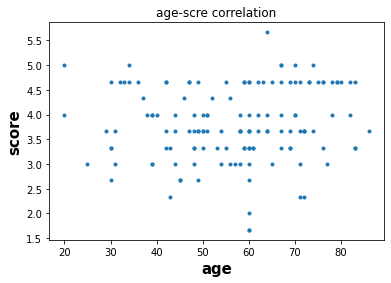

In [48]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()